In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data/', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
from torchvision import datasets
# Define the custom dataset
class CustomCIFAR10(torch.utils.data.Dataset):
    def __init__(self, dataset, label_map):
        self.dataset = dataset
        self.label_map = label_map

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Get the data and original label
        img, label = self.dataset[idx]
        # Apply the label swap mapping if the label exists in the mapping
        label = self.label_map.get(label, label)
        return img, label

# Original dataset
trainset = datasets.CIFAR10(root='./data/', 
                            train=True, 
                            download=True, 
                            transform=transform)

testset = datasets.CIFAR10(root='./data', 
                           train=False, 
                           download=True, 
                           transform=transform)

# Label swap mapping
label_swap = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}  # Swap 'car' (1) with 'bird' (2)

# Wrapped datasets
trainset_swapped = CustomCIFAR10(trainset, label_swap)

# Data loaders
trainloader = torch.utils.data.DataLoader(trainset_swapped, 
                                          batch_size=4, 
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4, 
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Example: Verify label swapping
dataiter = iter(trainloader)
images, labels = next(dataiter)

print('Swapped Labels:', labels)
# Visualize some of the images to ensure the labels match the new mapping

Swapped Labels: tensor([0, 9, 1, 1])


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
    import os
    epochs = 3
    model_directory_path = 'model/'
    model_path = model_directory_path + 'cifar-10-cnn-model2.pt'
    
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

[1,  2000] loss: 0.498
[1,  4000] loss: 0.495
[1,  6000] loss: 0.505
[1,  8000] loss: 0.500
[1, 10000] loss: 0.511
[1, 12000] loss: 0.498
[2,  2000] loss: 0.436
[2,  4000] loss: 0.450
[2,  6000] loss: 0.472
[2,  8000] loss: 0.465
[2, 10000] loss: 0.493
[2, 12000] loss: 0.460
[3,  2000] loss: 0.421
[3,  4000] loss: 0.424
[3,  6000] loss: 0.431
[3,  8000] loss: 0.433
[3, 10000] loss: 0.440
[3, 12000] loss: 0.452
Finished Training.
Saved model parameters to disk.
[1,  2000] loss: 0.385
[1,  4000] loss: 0.391
[1,  6000] loss: 0.405
[1,  8000] loss: 0.409
[1, 10000] loss: 0.409
[1, 12000] loss: 0.421
[2,  2000] loss: 0.344
[2,  4000] loss: 0.376
[2,  6000] loss: 0.377
[2,  8000] loss: 0.394
[2, 10000] loss: 0.386
[2, 12000] loss: 0.386
[3,  2000] loss: 0.339
[3,  4000] loss: 0.347
[3,  6000] loss: 0.338
[3,  8000] loss: 0.364
[3, 10000] loss: 0.367
[3, 12000] loss: 0.376
Finished Training.
Saved model parameters to disk.


In [10]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 36.24%


In [11]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 72.1
car        - 86.5
bird       - 0.0
cat        - 0.0
deer       - 0.0
dog        - 0.0
frog       - 0.0
horse      - 69.6
ship       - 70.1
truck      - 64.1


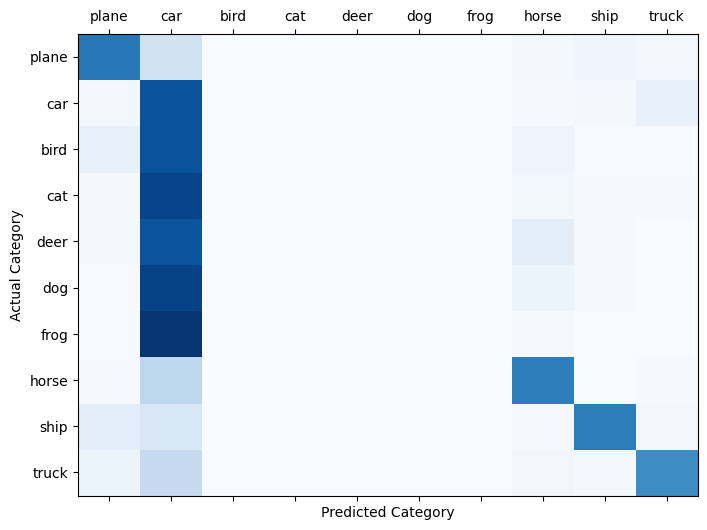

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [68]:
model = net
torch.save(model, 'model1_full.pth')